## Aplicacion de Técnicas de balanceo de datos

Se aplican los metodos de:

- RANDOM OVERSAMPLING
- RANDOM UNDERSAMPLING
- SMOTE
- ADASYN
- TOMEK LINKS

Estos metodos de aplican sobre el dataset optimizado por las tecnicas de Ingenieria de Caracteristicas aplicadas

In [1]:
import pandas as pd

dataset_work_3 = pd.read_csv('D:\DataSet\dataset_work_transformed.csv')
x = dataset_work_3.iloc[:,:-1]
y = dataset_work_3.iloc[:,-1].values
dataset_work_3.shape

(6435903, 19)

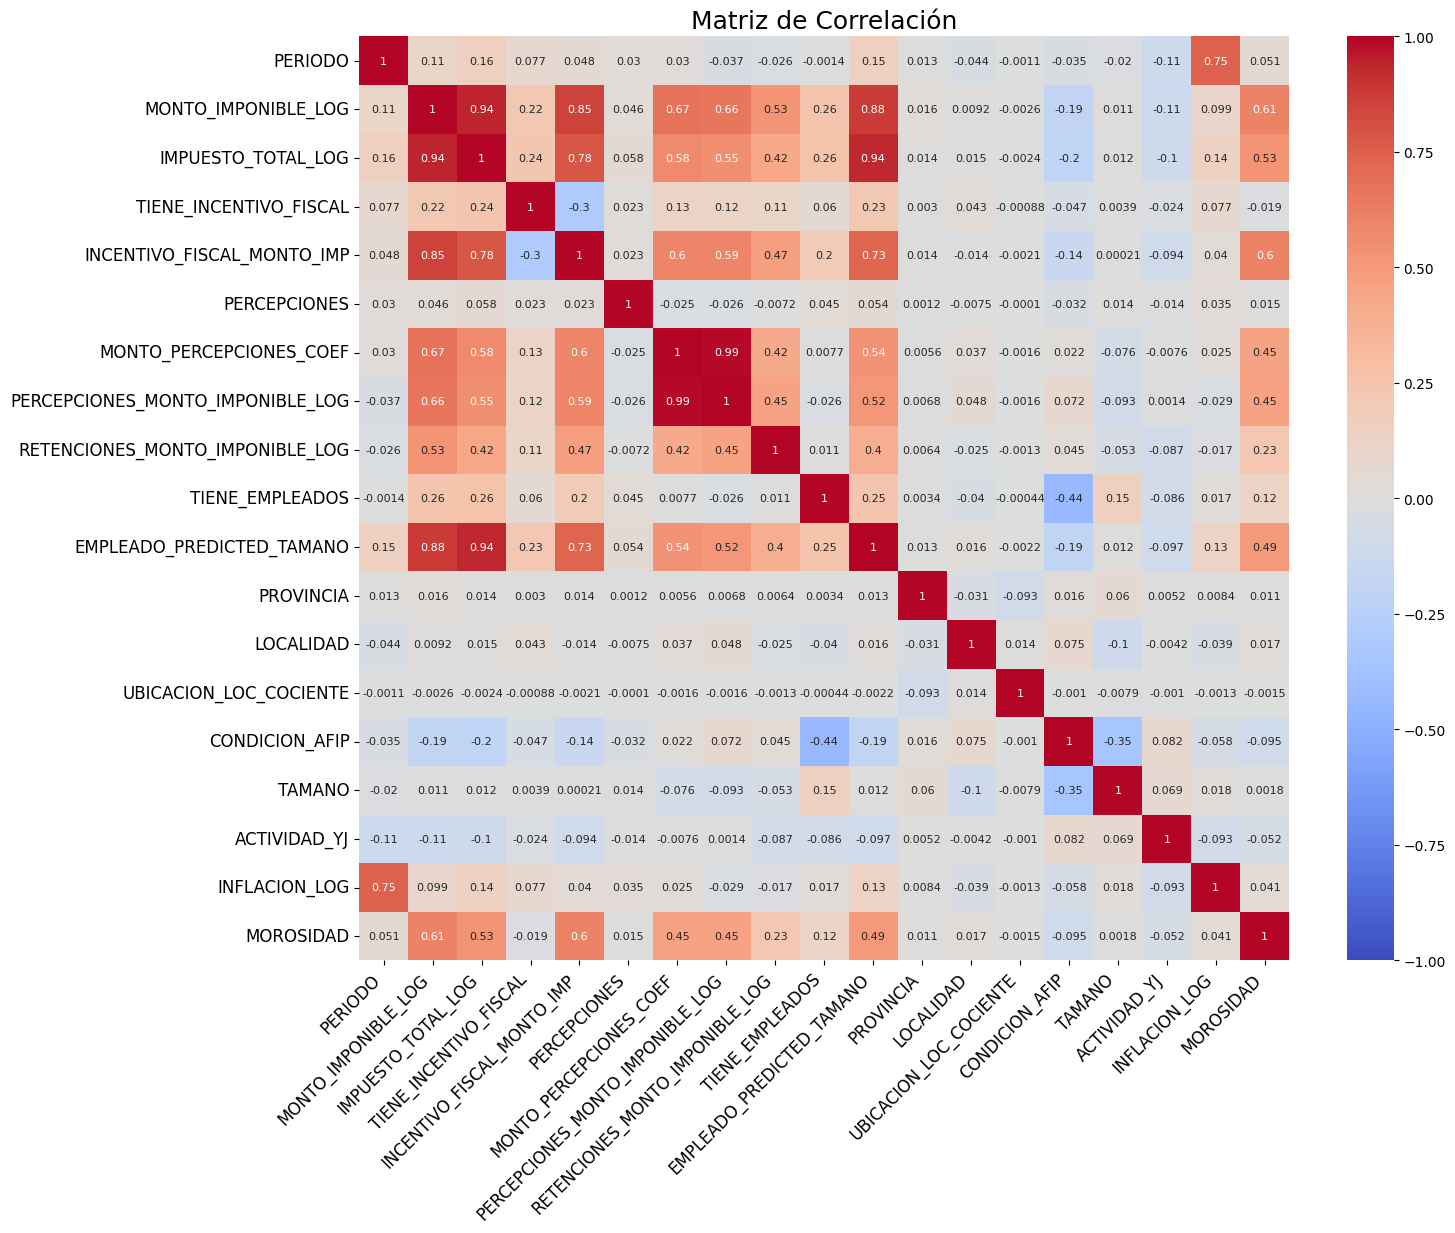

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
correlation_matrix = dataset_work_3.corr()

# Ajustamos el tamaño de la figura y el tamaño de los números
plt.figure(figsize=(15, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Ajustamos el tamaño de las anotaciones
plt.title('Matriz de Correlación', fontsize=18)  # Título más grande
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotamos y ajustamos las etiquetas del eje X
plt.yticks(fontsize=12)  # Ajustamos las etiquetas del eje Y
plt.show()

### 1. **Evaluación de métricas específicas para el desequilibrio de clases**
En un conjunto de datos desbalanceado, las métricas de evaluación tradicionales como el **accuracy** (exactitud) pueden ser engañosas, ya que un modelo podría obtener una alta precisión simplemente prediciendo la clase mayoritaria en todos los casos. En su lugar, es importante utilizar métricas que evalúen el rendimiento de las clases minoritarias y mayoritarias por separado.

#### Métricas a considerar:
- **Precision**: Qué porcentaje de las predicciones positivas son realmente positivas. Útil para evaluar la tasa de falsos positivos.
- **Recall (Sensibilidad)**: Qué porcentaje de las verdaderas instancias positivas fueron correctamente identificadas. Útil para evaluar los falsos negativos.
- **F1-Score**: La media armónica entre Precision y Recall. Es especialmente útil en problemas desbalanceados porque equilibra los falsos positivos y los falsos negativos.
- **Matriz de confusión**: Para visualizar cómo se comporta el modelo en cada clase (verdaderos positivos, verdaderos negativos, falsos positivos, falsos negativos).
- **AUC-ROC (Área bajo la curva ROC)**: Mide la capacidad del modelo para distinguir entre clases. Una curva ROC cerca de 1 indica un buen desempeño del modelo.

### Dividimos los grupos de Train y Test

Distribución original en y_train: Counter({0: 2615603, 1: 1889529})


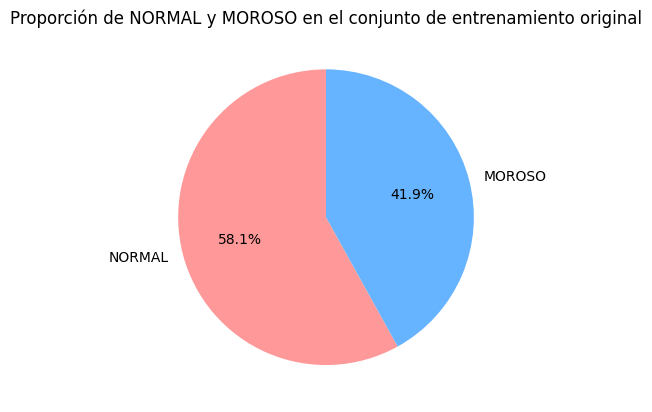

In [4]:
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from collections import Counter

# Definir variables dependientes (X) e independientes (y)
X = dataset_work_3.iloc[:, :-1]  # Todas las columnas menos la última (características)
y = dataset_work_3.iloc[:, -1]   # La última columna es la variable objetivo (morosidad)

# Dividimos el conjunto de datos en entrenamiento y prueba (70% entrenamiento y 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Ver la distribución de las clases en el conjunto de entrenamiento antes de SMOTE
print("Distribución original en y_train:", Counter(y_train))

# Generar gráfico de la distribución original
fig, ax = plt.subplots()
labels = ['NORMAL', 'MOROSO']
sizes = [Counter(y_train)[0], Counter(y_train)[1]]
colors = ['#ff9999','#66b3ff']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento original")
plt.show()


### Aplicamos RANDOM OVERSAMPLING a los datos de entrenamiento

Distribución después de Random Oversampling en y_train_ros: Counter({0: 2615603, 1: 2615603})


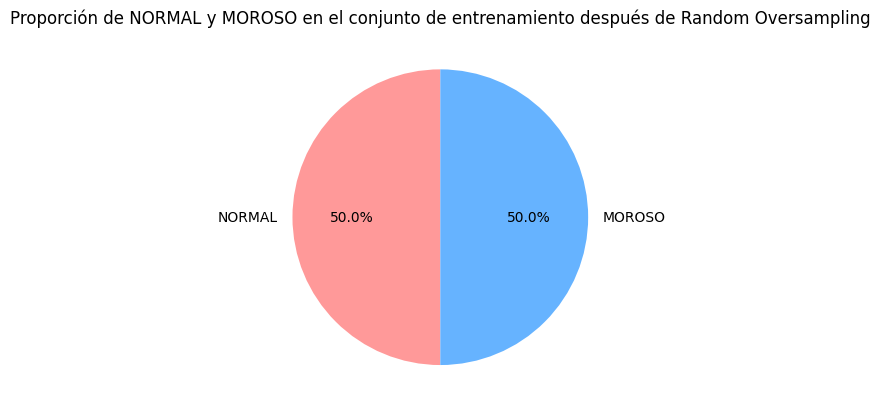

In [5]:
from imblearn.over_sampling import RandomOverSampler

# Aplicar Random Oversampling al conjunto de entrenamiento para balancear las clases
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Ver la distribución de las clases después de Random Oversampling
print("Distribución después de Random Oversampling en y_train_ros:", Counter(y_train_ros))

# Generar gráfico de la distribución balanceada después de Random Oversampling
fig, ax = plt.subplots()
labels = ['NORMAL', 'MOROSO']
sizes = [Counter(y_train_ros)[0], Counter(y_train_ros)[1]]
colors = ['#ff9999', '#66b3ff']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento después de Random Oversampling")
plt.show()


### Aplicamos RANDOM UNDERSAMPLING a los datos de entrenamiento

Distribución después de Random Undersampling en y_train_rus: Counter({0: 1889529, 1: 1889529})


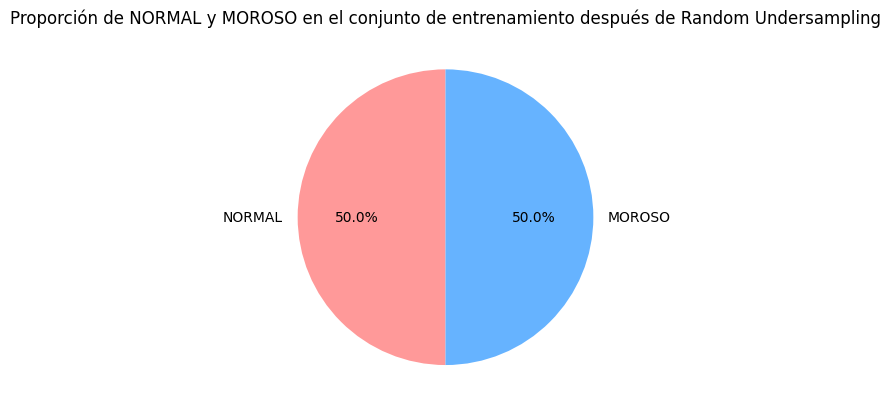

In [6]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import matplotlib.pyplot as plt

# Aplicar Random Undersampling al conjunto de entrenamiento para balancear las clases
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Ver la distribución de las clases después de Random Undersampling
print("Distribución después de Random Undersampling en y_train_rus:", Counter(y_train_rus))

# Generar gráfico de la distribución balanceada después de Random Undersampling
fig, ax = plt.subplots()
etiquetas = ['NORMAL', 'MOROSO']
tamaños = [Counter(y_train_rus)[0], Counter(y_train_rus)[1]]
colores = ['#ff9999', '#66b3ff']
ax.pie(tamaños, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento después de Random Undersampling")
plt.show()


### Aplicamos SMOTE a los datos de entrenamiento

In [7]:
from imblearn.over_sampling import SMOTE
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Aplicar SMOTE al conjunto de entrenamiento para balancear las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Ver la distribución de las clases después de SMOTE
print("Distribución después de SMOTE en y_train_smote:", Counter(y_train_smote))


# Generar gráfico de la distribución balanceada después de SMOTE
fig, ax = plt.subplots()
labels = ['NORMAL', 'MOROSO']
sizes = [Counter(y_train_smote)[0], Counter(y_train_smote)[1]]
colors = ['#ff9999','#66b3ff']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento después de SMOTE")
plt.show()

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Aplicamos ADASYN a los datos de entrenamiento

Distribución original en y_train: Counter({0: 2615570, 1: 1889506})
Distribución después de SMOTE en y_train_smote: Counter({0: 2615570, 1: 2615570})


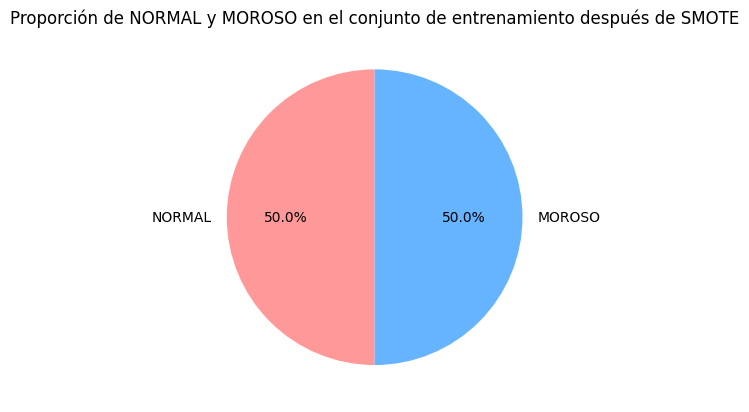

Distribución después de ADASYN en y_train_adasyn: Counter({0: 2615570, 1: 2347005})


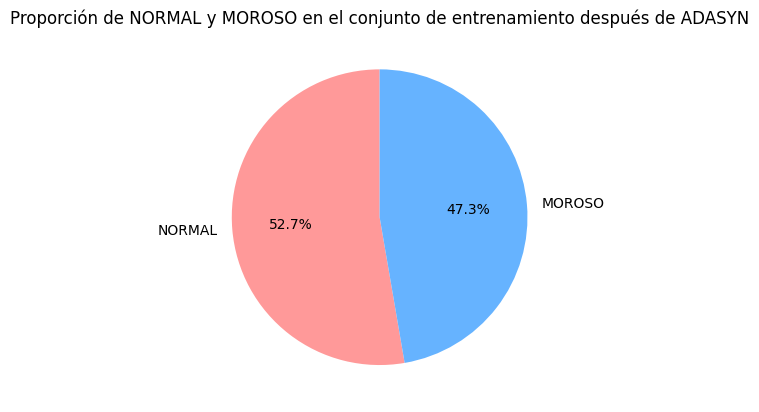

El tiempo total de ejecución fue de 239 minutos y 30.66 segundos.


In [ ]:
from imblearn.over_sampling import ADASYN

# Medir el tiempo de inicio
start_time = time.time()
 
# Aplicar ADASYN al conjunto de entrenamiento para balancear las clases
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Ver la distribución de las clases después de ADASYN
print("Distribución después de ADASYN en y_train_adasyn:", Counter(y_train_adasyn))

# Generar gráfico de la distribución balanceada después de ADASYN
fig, ax = plt.subplots()
labels = ['NORMAL', 'MOROSO']
sizes = [Counter(y_train_adasyn)[0], Counter(y_train_adasyn)[1]]
colors = ['#ff9999','#66b3ff']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento después de ADASYN")
plt.show()


# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

### Aplicamos TOMEK LINK a los datos de entrenamiento

In [ ]:
from imblearn.under_sampling import TomekLinks

# Medir el tiempo de inicio
start_time = time.time()

# Aplicar Tomek Links al conjunto de entrenamiento para balancear las clases
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Ver la distribución de las clases después de aplicar Tomek Links
print("Distribución después de Tomek Links en y_train_tomek:", Counter(y_train_tomek))

# Generar gráfico de la distribución balanceada después de aplicar Tomek Links
fig, ax = plt.subplots()
labels = ['NORMAL', 'MOROSO']
sizes = [Counter(y_train_tomek)[0], Counter(y_train_tomek)[1]]
colors = ['#ff9999', '#66b3ff']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento después de Tomek Links")
plt.show()

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")
